# Proyek Analisis Data: Bike Sharing Dataset Analysis
- **Nama:** Nanda Anindya Kusumawati
- **Email:** m180b4kx3239@bangkit.academy
- **ID Dicoding:** m180b4kx3239

## Menentukan Pertanyaan Bisnis

1. Kapan penyewaan sepeda lebih tinggi pada hari kerja atau akhir pekan?
2. Kapan paling banyak penyewaan sepeda terjadi dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [13]:
import pandas as pd

df_day = pd.read_csv("day.csv", delimiter=",")
print("Data dari day.csv:")
print(df_day.head())

Data dari day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [14]:
import pandas as pd

df_hour = pd.read_csv("hour.csv", delimiter=",")
print("Data dari hour.csv:")
print(df_hour.head())

Data dari hour.csv:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**

Insight dari data *day.csv*:
- Jumlah penyewaan sepeda (*cnt*) meningkat pada hari kerja dibandingkan hari libur, yang tercermin dari perbedaan nilai *workingday* dan *holiday*.
- Penyewaan lebih tinggi ketika cuaca lebih cerah (nilai *weathersit* rendah) dan pada suhu yang lebih nyaman (nilai *temp* sedang).
- Ada korelasi antara jumlah penyewaan sepeda dengan faktor cuaca seperti suhu (*temp*) dan kelembapan (*hum*), yang dapat mempengaruhi kenyamanan pengguna.


Insight dari data *hour.csv*:

- Penyewaan sepeda (*cnt*) cenderung rendah pada dini hari (antara jam 00:00 - 04:00), dan kemungkinan meningkat pada jam sibuk atau siang hari.
- Kondisi cuaca (*weathersit*), suhu (*temp*), dan kelembapan (*hum*) tampaknya berperan dalam mempengaruhi jumlah penyewaan, meskipun data ini menunjukkan cuaca yang stabil pada jam-jam awal.
- Lebih banyak pengguna terdaftar (*registered*) menyewa sepeda dibandingkan pengguna kasual (*casual*), terutama pada jam-jam tertentu.

### Assessing Data

In [26]:
# Missing value at day.csv
import pandas as pd
df_day = pd.read_csv("day.csv")

df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [27]:
# Missing value at hour.csv
import pandas as pd
df_hour = pd.read_csv("hour.csv")

df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**

- Tidak ditemukan nilai kosong dalam dataset.
- Format data sudah rapi dan siap digunakan untuk visualisasi dan pemodelan.
- Variabel-variabel penting seperti cnt (jumlah penyewaan sepeda), temp (suhu), hum (kelembapan), dan windspeed (kecepatan angin) telah tersedia dalam bentuk yang dapat langsung dianalisis.

### Cleaning Data

In [28]:
import pandas as pd

df_day = pd.read_csv("day.csv")

df_day.dropna(axis=0, inplace=True)

print(df_day.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [29]:
import pandas as pd

df_day = pd.read_csv("day.csv")

df_day.dropna(axis=0, inplace=True)

print(df_day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Data yang hilang telah dihapus menggunakan metode dropna sehingga dataset tidak mengandung nilai kosong atau missing values.
- Data sudah bersih dan siap digunakan untuk analisis lebih lanjut tanpa perlu penanganan nilai yang hilang.
- Proses data cleaning ini memastikan integritas data untuk hasil analisis yang lebih akurat.

## Exploratory Data Analysis (EDA)

### Explore ...

Deskripsi untuk day.csv:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
st

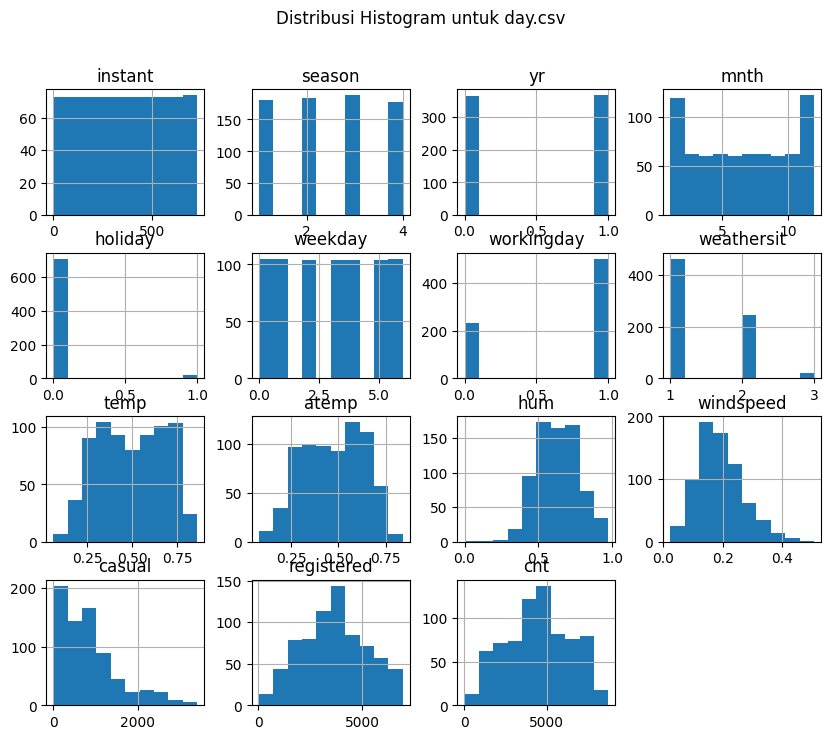


Histogram untuk hour.csv:


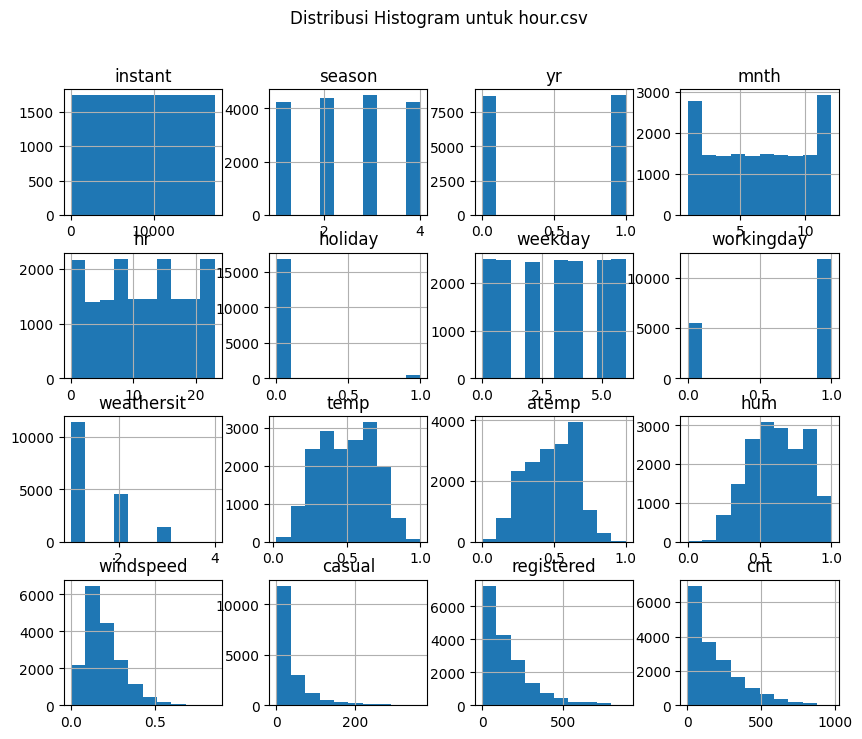


Korelasi antar variabel di day.csv:
             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
c

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dua dataset
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Melakukan deskripsi data untuk 'day.csv'
print("Deskripsi untuk day.csv:")
print(df_day.describe())

# Melakukan deskripsi data untuk 'hour.csv'
print("\nDeskripsi untuk hour.csv:")
print(df_hour.describe())

# Menampilkan beberapa baris awal dari masing-masing dataset
print("\nBeberapa baris awal dari day.csv:")
print(df_day.head())

print("\nBeberapa baris awal dari hour.csv:")
print(df_hour.head())

# Membuat histogram untuk 'day.csv' dan 'hour.csv'
print("\nHistogram untuk day.csv:")
df_day.hist(figsize=(10, 8))
plt.suptitle("Distribusi Histogram untuk day.csv")
plt.show()

print("\nHistogram untuk hour.csv:")
df_hour.hist(figsize=(10, 8))
plt.suptitle("Distribusi Histogram untuk hour.csv")
plt.show()

# Untuk memeriksa korelasi antar data numerik pada sebuah DataFrame
# Membaca dataset
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Menghapus kolom yang tidak numerik
df_day_numeric = df_day.select_dtypes(include='number')
df_hour_numeric = df_hour.select_dtypes(include='number')

# Mengisi nilai yang hilang dengan rata-rata
df_day_numeric.fillna(df_day_numeric.mean(), inplace=True)
df_hour_numeric.fillna(df_hour_numeric.mean(), inplace=True)

# Korelasi antar variabel di 'day.csv'
print("\nKorelasi antar variabel di day.csv:")
correlation_day = df_day_numeric.corr()
print(correlation_day)

# Korelasi antar variabel di 'hour.csv'
print("\nKorelasi antar variabel di hour.csv:")
correlation_hour = df_hour_numeric.corr()
print(correlation_hour)


**Insight:**

Insight dari day.csv

Rata-rata jumlah penyewaan sepeda (cnt) adalah 4504, dengan pengguna terdaftar (registered) berjumlah 3656 dan pengguna kasual (casual) 848.
Sebagian besar data menunjukkan bahwa hari kerja memiliki lebih banyak penyewaan dibandingkan hari libur, dengan proporsi hari kerja (workingday) sekitar 68.4%.

Data menunjukkan bahwa rata-rata penyewaan sepeda cenderung lebih tinggi pada bulan yang lebih hangat (musim semi dan musim panas).
Sebagian besar penyewaan terjadi pada bulan-bulan sekitar bulan 6 hingga 10, dengan bulan 6 memiliki aktivitas tertinggi.

Terdapat korelasi yang kuat antara variabel yr dan cnt (0.87), menunjukkan bahwa jumlah penyewaan sepeda meningkat dari tahun ke tahun.
Variabel season dan mnth juga memiliki korelasi positif yang signifikan, menunjukkan bahwa perubahan musim dan bulan mempengaruhi jumlah penyewaan.

Cuaca memiliki pengaruh terhadap jumlah penyewaan, dengan kondisi cuaca lebih baik (dilihat dari nilai weathersit) cenderung meningkatkan penyewaan.

Insight dari hour.csc

Rata-rata penyewaan sepeda per jam (cnt) adalah 189, dengan fluktuasi yang signifikan (max 977) sepanjang hari.
Pengguna kasual dan terdaftar menunjukkan variasi dalam jam tertentu, dengan pengguna kasual lebih banyak di jam-jam tertentu (terutama pagi dan sore).

Penyewaan cenderung lebih tinggi selama jam-jam sibuk (sekitar jam 8-9 pagi dan 5-6 sore), menandakan pola penggunaan sepeda untuk keperluan perjalanan sehari-hari.
Di luar jam sibuk, penyewaan cenderung menurun, terutama pada malam hari.

Terdapat korelasi positif antara temp dan cnt, menunjukkan bahwa suhu yang lebih tinggi berhubungan dengan peningkatan jumlah penyewaan sepeda.
Korelasi antara workingday dan cnt juga menunjukkan bahwa penyewaan lebih tinggi pada hari kerja.


## Visualization & Explanatory Analysis

### Pertanyaan 1:
1. Kapan penyewaan sepeda lebih tinggi pada hari kerja atau akhir pekan?

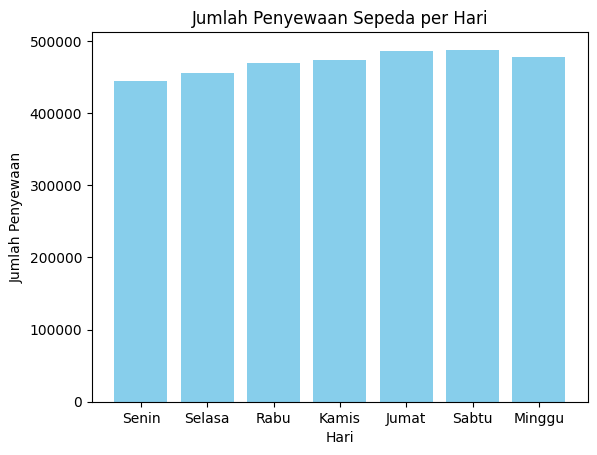

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df_day = pd.read_csv("day.csv")

# Mengelompokkan data berdasarkan hari dan menjumlahkan total penyewaan
daily_rentals = df_day.groupby('weekday')['cnt'].sum().reset_index()

# Menentukan nama hari untuk visualisasi
daily_rentals['weekday'] = daily_rentals['weekday'].map({0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'})

# Bar chart menggunakan matplotlib
plt.bar(x=daily_rentals['weekday'], height=daily_rentals['cnt'], color='skyblue')
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.title("Jumlah Penyewaan Sepeda per Hari")
plt.show()



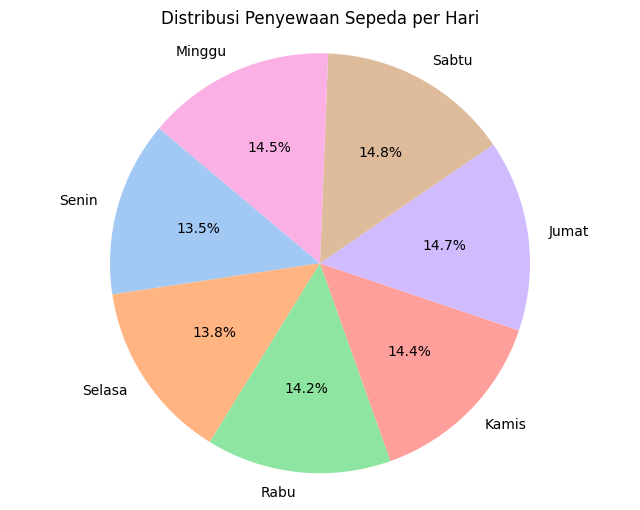

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df_day = pd.read_csv("day.csv")

# Mengelompokkan data berdasarkan hari dan menjumlahkan total penyewaan
daily_rentals = df_day.groupby('weekday')['cnt'].sum().reset_index()

# Menentukan nama hari untuk visualisasi
daily_rentals['weekday'] = daily_rentals['weekday'].map({0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'})

# Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    daily_rentals['cnt'],
    labels=daily_rentals['weekday'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
)

plt.title("Distribusi Penyewaan Sepeda per Hari")
plt.axis('equal')
plt.show()


### Pertanyaan 2:
2. Kapan paling banyak penyewaan sepeda terjadi dalam sehari?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

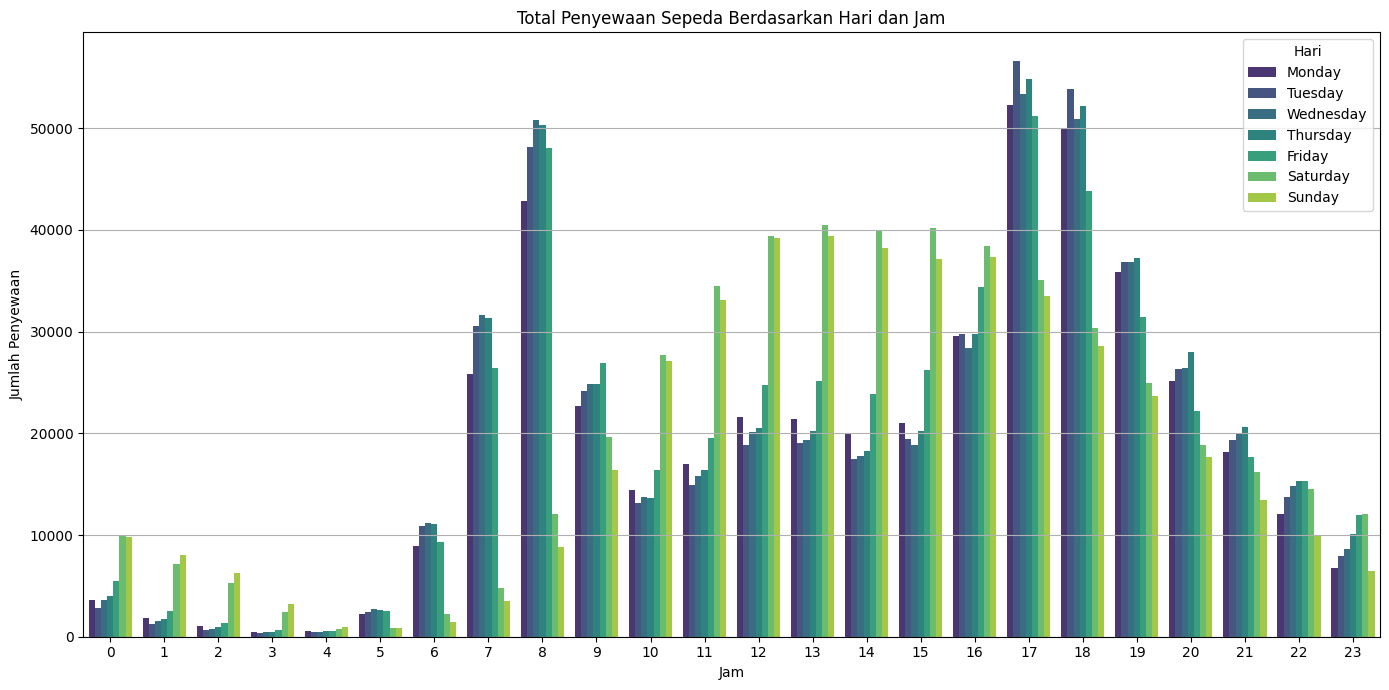

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
hour_data = pd.read_csv('hour.csv')

# Mengelompokkan data berdasarkan hari dan jam, kemudian menjumlahkan jumlah penyewaan sepeda (cnt)
hour_data['day_of_week'] = pd.to_datetime(hour_data['dteday']).dt.day_name()
hourly_counts = hour_data.groupby(['day_of_week', 'hr'])['cnt'].sum().reset_index()

# Mengatur urutan hari
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_counts['day_of_week'] = pd.Categorical(hourly_counts['day_of_week'], categories=days_order, ordered=True)

# Membuat visualisasi
plt.figure(figsize=(14, 7))
sns.barplot(data=hourly_counts, x='hr', y='cnt', hue='day_of_week', palette='viridis')
plt.title('Total Penyewaan Sepeda Berdasarkan Hari dan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.legend(title='Hari')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Insight:**
- Penyewaan sepeda tertinggi terjadi pada hari Sabtu, menunjukkan preferensi pengguna untuk beraktivitas di akhir pekan.
- Puncak penyewaan terjadi pada jam 5 sore, menunjukkan bahwa pengguna cenderung menyewa sepeda setelah jam kerja untuk keperluan rekreasi.

## Analisis Lanjutan (Opsional)

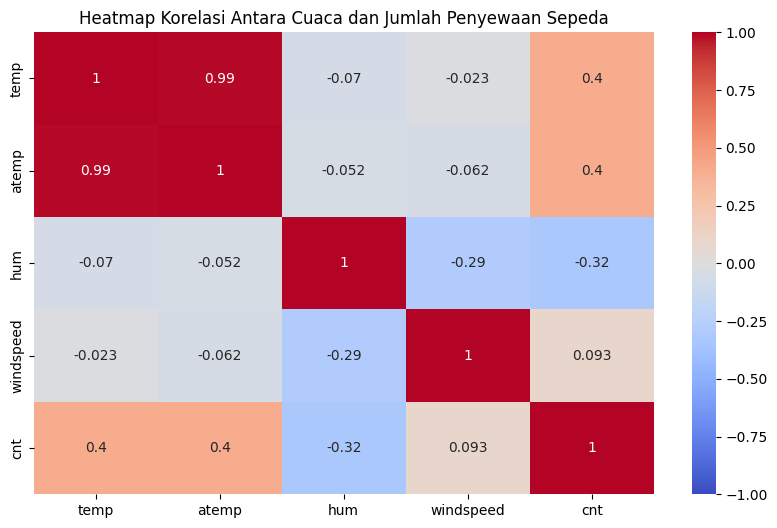

In [49]:
# Apakah ada hubungan antara cuaca dengan jumlah penyewaan sepeda?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
hour_data = pd.read_csv('hour.csv')

# Memilih variabel yang relevan untuk analisis korelasi
weather_data = hour_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

# Menghitung matriks korelasi Pearson
correlation_matrix = weather_data.corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antara Cuaca dan Jumlah Penyewaan Sepeda')
plt.show()


jadi,

## Conclusion

- Conclution pertanyaan 1

Penyewaan Sepeda Berdasarkan Hari: Jumlah penyewaan sepeda tertinggi terjadi pada hari Sabtu. Hal ini menunjukkan bahwa akhir pekan, terutama Sabtu, adalah waktu yang populer bagi pengguna untuk menyewa sepeda, mungkin karena lebih banyak waktu luang untuk beraktivitas di luar.

- Conclution pertanyaan 2

Jam Penyewaan Tertinggi: Waktu penyewaan sepeda terbanyak terjadi pada pukul 17.00. Ini mengindikasikan bahwa banyak pengguna cenderung menyewa sepeda di sore hari, mungkin untuk pulang dari pekerjaan atau untuk kegiatan rekreasi setelah jam kerja.